<a href="https://colab.research.google.com/github/markbriers/data-science-jupyter/blob/main/week10_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10: Generative AI

### Lesson objectives:

* By the end of the lecture, you will recognise the key components of the vanilla transformer network.

* By the end of the lecture, you will know the key mechanisms for getting the most out of GenAI.

## Introduction to Transformer Networks
Transformer networks have revolutionised the field of natural language processing (NLP) since their introduction in the paper "Attention Is All You Need" by Vaswani et al. in 2017. They are based on the self-attention mechanism, allowing models to weigh the importance of different words in a sentence. The transformer architecture does not follow the more traditional notion of recurrence and instead relies entirely on attention mechanisms to draw global dependencies between input and output. The diagram below illustrates the key concepts:

### 1. Positional Encoding
- **Function**: Adds information about the position of each token in the sequence to the model, as the transformer does not inherently process sequential data in order.
- **Benefits**: Ensures that the model can recognize and use the order of tokens, which is critical for understanding language.

### 2. Self-Attention Mechanism
- **Function**: Allows the model to weigh the importance of each part of the input data differently and is instrumental in understanding the context within sequences.
- **Benefits**: Enables the model to capture long-range dependencies and relationships in the data, significantly improving its understanding of the context compared to RNNs or CNNs.

### 3. Multi-Head Attention
- **Function**: An extension of the self-attention mechanism that allows the model to jointly attend to information from different representation subspaces at different positions.
- **Benefits**: Provides the ability to capture multiple aspects of information between tokens, enhancing the model's capacity to understand complex relationships.

### 4. Point-Wise Feed-Forward Networks
- **Function**: Consists of fully connected layers applied to each position separately and identically. This component follows the self-attention layer in each transformer block.
- **Benefits**: Introduces additional non-linearity into the model, allowing it to learn more complex mappings from inputs to outputs.

### 5. Layer Normalisation and Residual Connections
- **Layer Normalization**: Standardizes the inputs across the features for each layer, improving training stability and speed.
- **Residual Connections**: Helps in mitigating the vanishing gradient problem by adding the input of each sub-layer (before and after the multi-head attention and feed-forward networks) to its output.
- **Benefits**: Both mechanisms work together to facilitate deeper models by improving the flow of gradients during training and stabilizing the learning process.

### 6. Encoder-Decoder Architecture
- **Encoders**: Process the input sequence and generate a set of representations; the transformer model stacks multiple encoders.
- **Decoders**: Use the encoders' output along with previous output tokens to generate predictions for the next token in the sequence.
- **Benefits**: This architecture allows the model to be versatile in handling various NLP tasks such as translation, text generation, and comprehension by adjusting the flow of information between encoders and decoders.

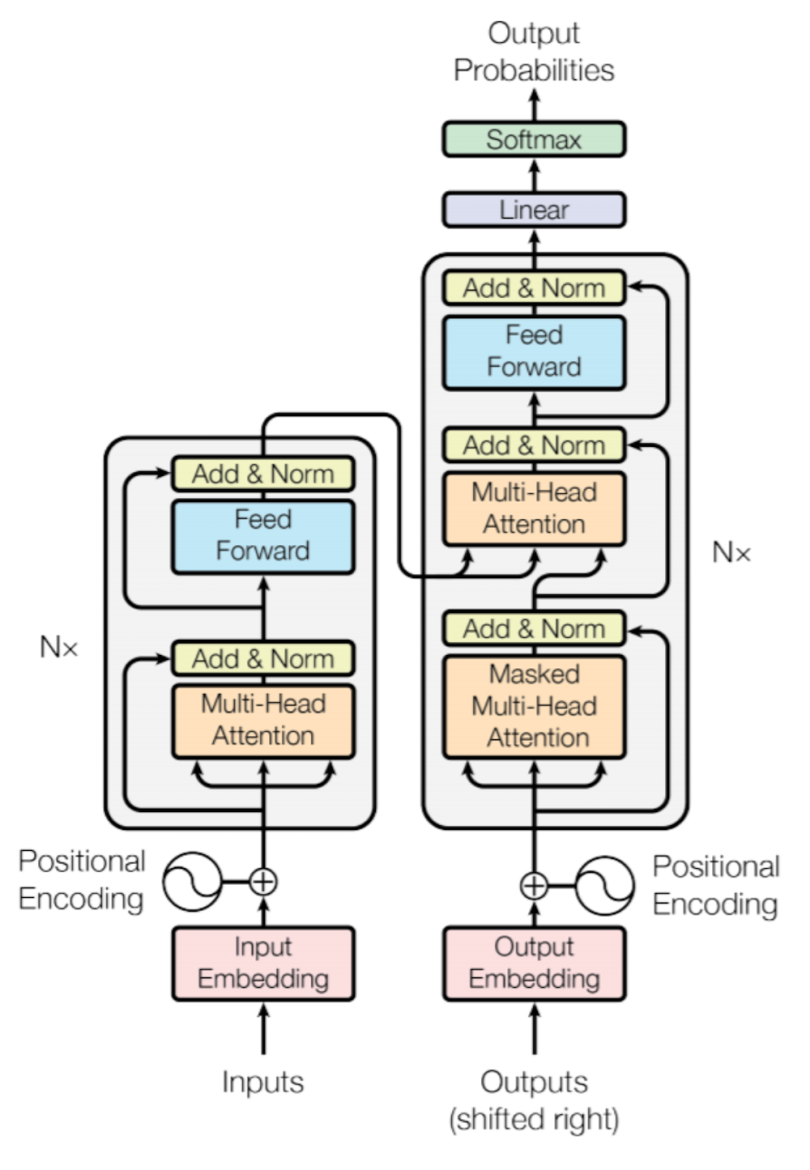

There are several stages involved in training a large language model, which are depicted in the diagram below (credit: Andrej Karpathy, https://www.linkedin.com/posts/tvykruta_this-llm-presentation-by-andrej-karpathy-activity-7067198321127256064-0rMe/?trk=public_profile_like_view).

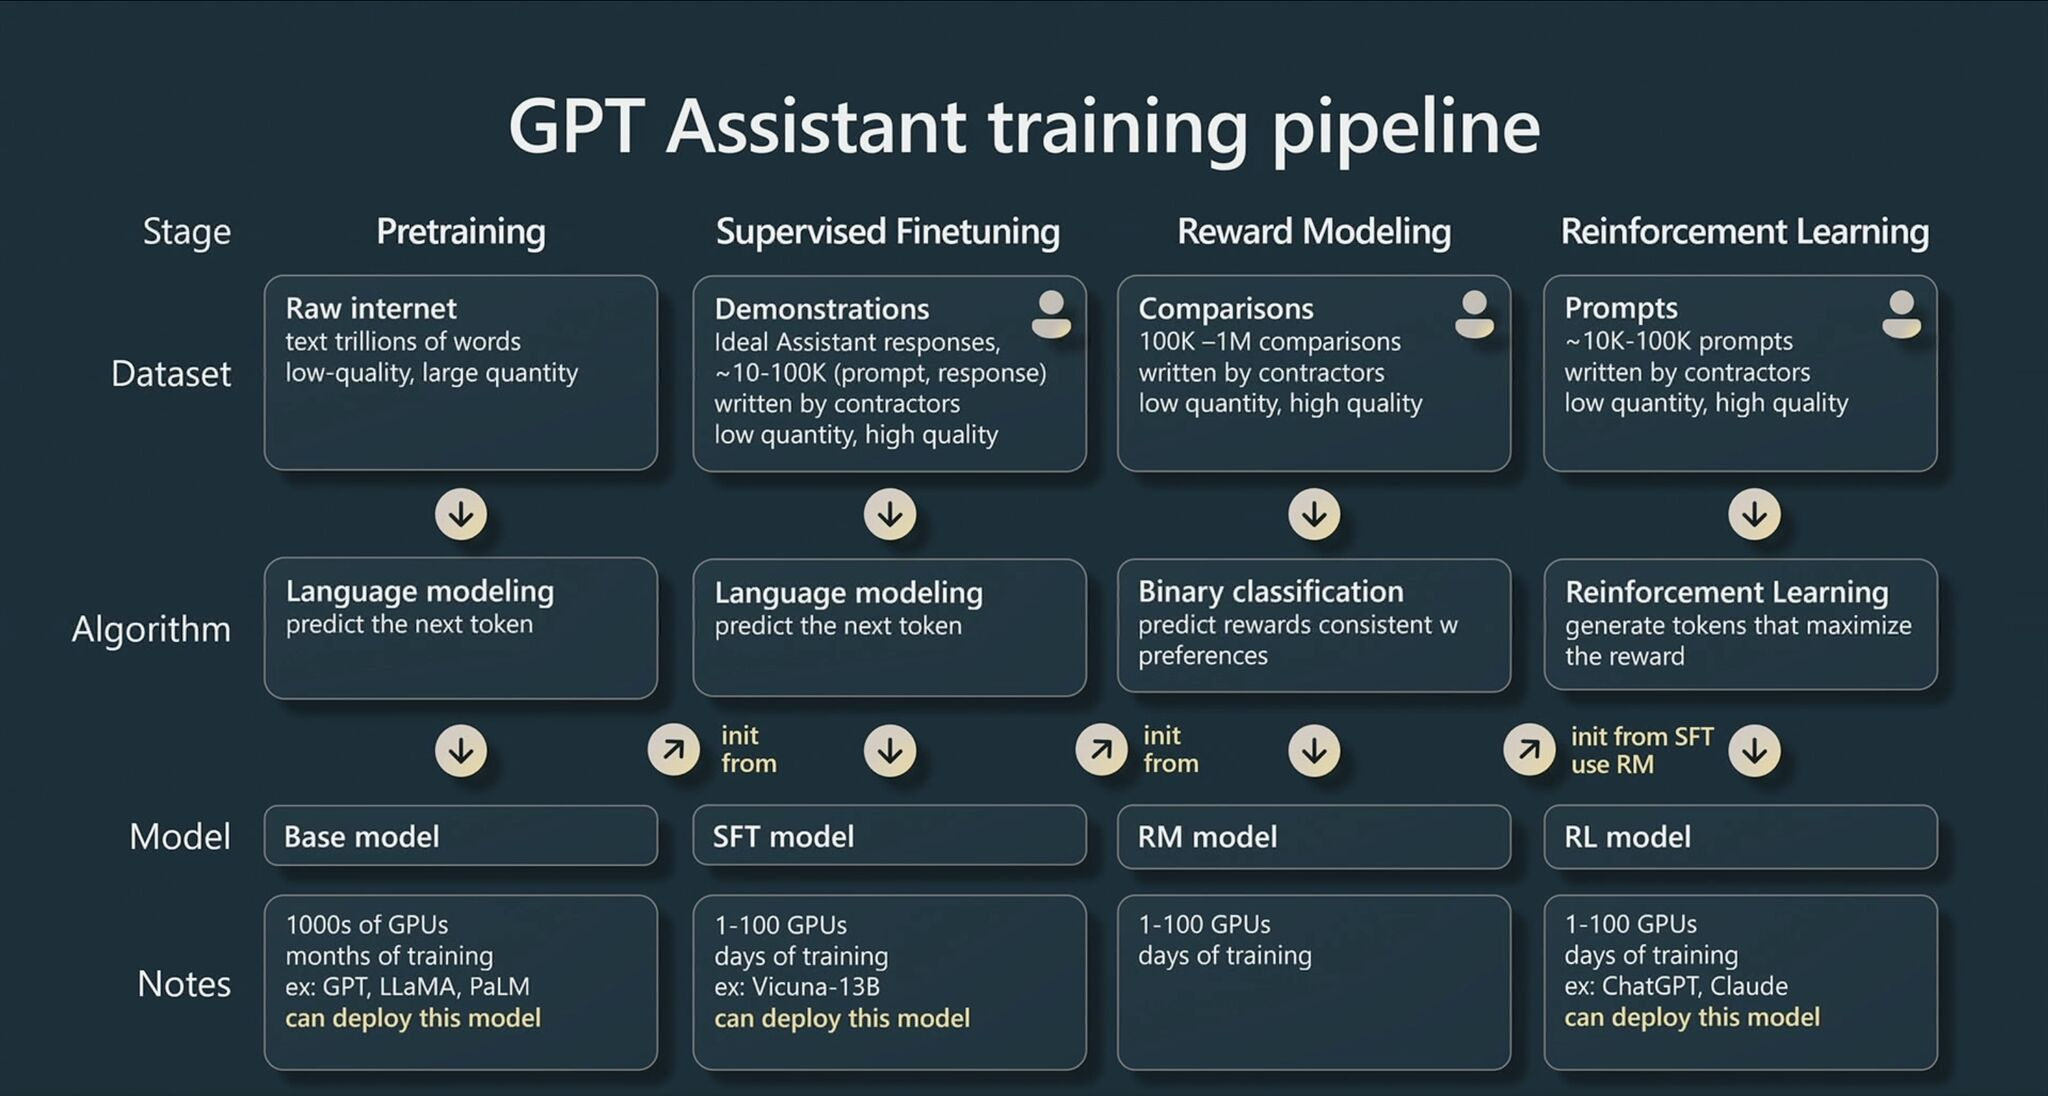

The diagram presents a four-stage training pipeline for a language model like GPT (Generative Pre-trained Transformer):

1. **Pretraining**
    - **Dataset**: Uses raw internet text, consisting of trillions of words. This data is characterised as low-quality but in large quantity.
    - **Algorithm**: Language modeling is used, which predicts the next token (word or character) in the sequence.
    - **Model**: The outcome is the base model.
    - **Notes**: This step involves thousands of GPUs and months of training. Examples of models that can be deployed at this stage include GPT, LLAMA, and PaLM.

2. **Supervised Finetuning**
    - **Dataset**: Consists of demonstrations or ideal assistant responses, ranging from around 10,000 to 100,000 (prompt, response) pairs written by contractors. These are high-quality but low in quantity.
    - **Algorithm**: Language modeling continues to be used to predict the next token.
    - **Model**: The result is the SFT (Supervised Finetuning) model.
    - **Notes**: Requires 1 to 100 GPUs and days of training. An example of a model at this stage is Vicuna-13B, and it can also be deployed.

3. **Reward Modeling**
    - **Dataset**: Comprises 100,000 to 1 million comparisons written by contractors, which are also low in quantity but high in quality.
    - **Algorithm**: Binary classification is employed to predict rewards consistent with human preferences.
    - **Model**: The RM (Reward Model) is produced.
    - **Notes**: Similar to supervised finetuning, this step requires 1 to 100 GPUs and days of training.

4. **Reinforcement Learning**
    - **Dataset**: Involves around 10,000 to 100,000 prompts written by contractors. This is considered high-quality data but is low in quantity.
    - **Algorithm**: Reinforcement Learning is utilized to generate tokens that maximize the reward.
    - **Model**: The RL (Reinforcement Learning) model is developed.
    - **Notes**: Again, this stage involves 1 to 100 GPUs and days of training. Examples of deployable models at this stage include ChatGPT and Claude.

Each stage of the training pipeline builds upon the previous one, with the models becoming more specialized and fine-tuned for their specific tasks as they progress.

## GPT inference, in code

In [3]:
from huggingface_hub import login
login()

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b-it")
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it")

tokenizer_config.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [5]:
input_text = "Write me a poem about learning data science."
input_ids = tokenizer(input_text, return_tensors="pt")

outputs = model.generate(**input_ids)
print(tokenizer.decode(outputs[0]))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<bos>Write me a poem about learning data science.

Numbers dance, a symphony,
Algorithms weave


## Prompting strategies

Creating effective prompts for a GPT (Generative Pre-trained Transformer) model is an art and a science that involves clear communication, understanding the model's capabilities, and creatively leveraging its vast knowledge base. This guide will walk you through the fundamentals of prompting a GPT model, emphasising principles, chain-of-thought reasoning, and other tips to enhance your interactions with AI.

### Understanding GPT

First, as we learnt above, it's essential to know that GPT models are trained on diverse internet text, making them capable of understanding and generating human-like text based on the input (prompt) they receive. However, they don't "understand" content in the human sense but recognize patterns in data.

### Prompting Principles

#### Clarity and Specificity
- **Be Clear**: Use straightforward language that directly communicates what you want the model to do.
- **Be Specific**: Specific prompts yield more accurate and relevant responses. Include relevant details to guide the model's output.

#### Conciseness
- **Be Concise**: While detail is good, unnecessary verbosity can confuse the model. Strive for a balance between being informative and concise.

#### Contextualization
- **Provide Context**: When asking complex questions or requesting detailed responses, provide the model with context. This background information helps generate more accurate and coherent answers.

### Advanced Prompting Techniques

#### Chain-of-Thought Reasoning
- **Leverage Logical Steps**: For complex problem-solving, prompt the model to break down the problem into smaller, logical steps before arriving at the conclusion. This technique, known as chain-of-thought reasoning, can help the model produce more thoughtful and accurate solutions.

#### Iterative Refinement
- **Refine Your Prompt**: If the first response isn't satisfactory, refine your prompt by adding more details, clarifying your request, or simplifying complicated questions. This iterative process can lead to better outcomes.

#### Zero-Shot and Few-Shot Learning
- **Leverage Learning Abilities**: GPT models can generate responses based on a few examples (few-shot learning) or even without any (zero-shot learning). You can include examples in your prompt to guide the model's style, tone, or content of the response.

### Creative Prompting
- **Role-Playing**: Pretend the AI is a specific character or expert. This can make the interaction more engaging and yield unique responses.
- **Imaginative Scenarios**: Place the AI in hypothetical situations to explore creative responses or novel ideas.

### Ethical Considerations
- **Responsible Use**: Avoid prompts that could lead to generating harmful, biased, or inappropriate content.
- **Privacy**: Don't input personal, sensitive, or confidential information when crafting prompts.

### Example Prompts

#### Basic Inquiry
- "Explain the basics of quantum physics in simple terms."

#### Chain-of-Thought
- "How do you solve quadratic equations? Break down the steps."

#### Creative Prompt
- "Write a short story about a time-traveling historian in ancient Rome."

#### Few-Shot Learning
- "Here are three examples of email sign-offs. Generate a similar polite sign-off for an email to a new colleague."


## Recap

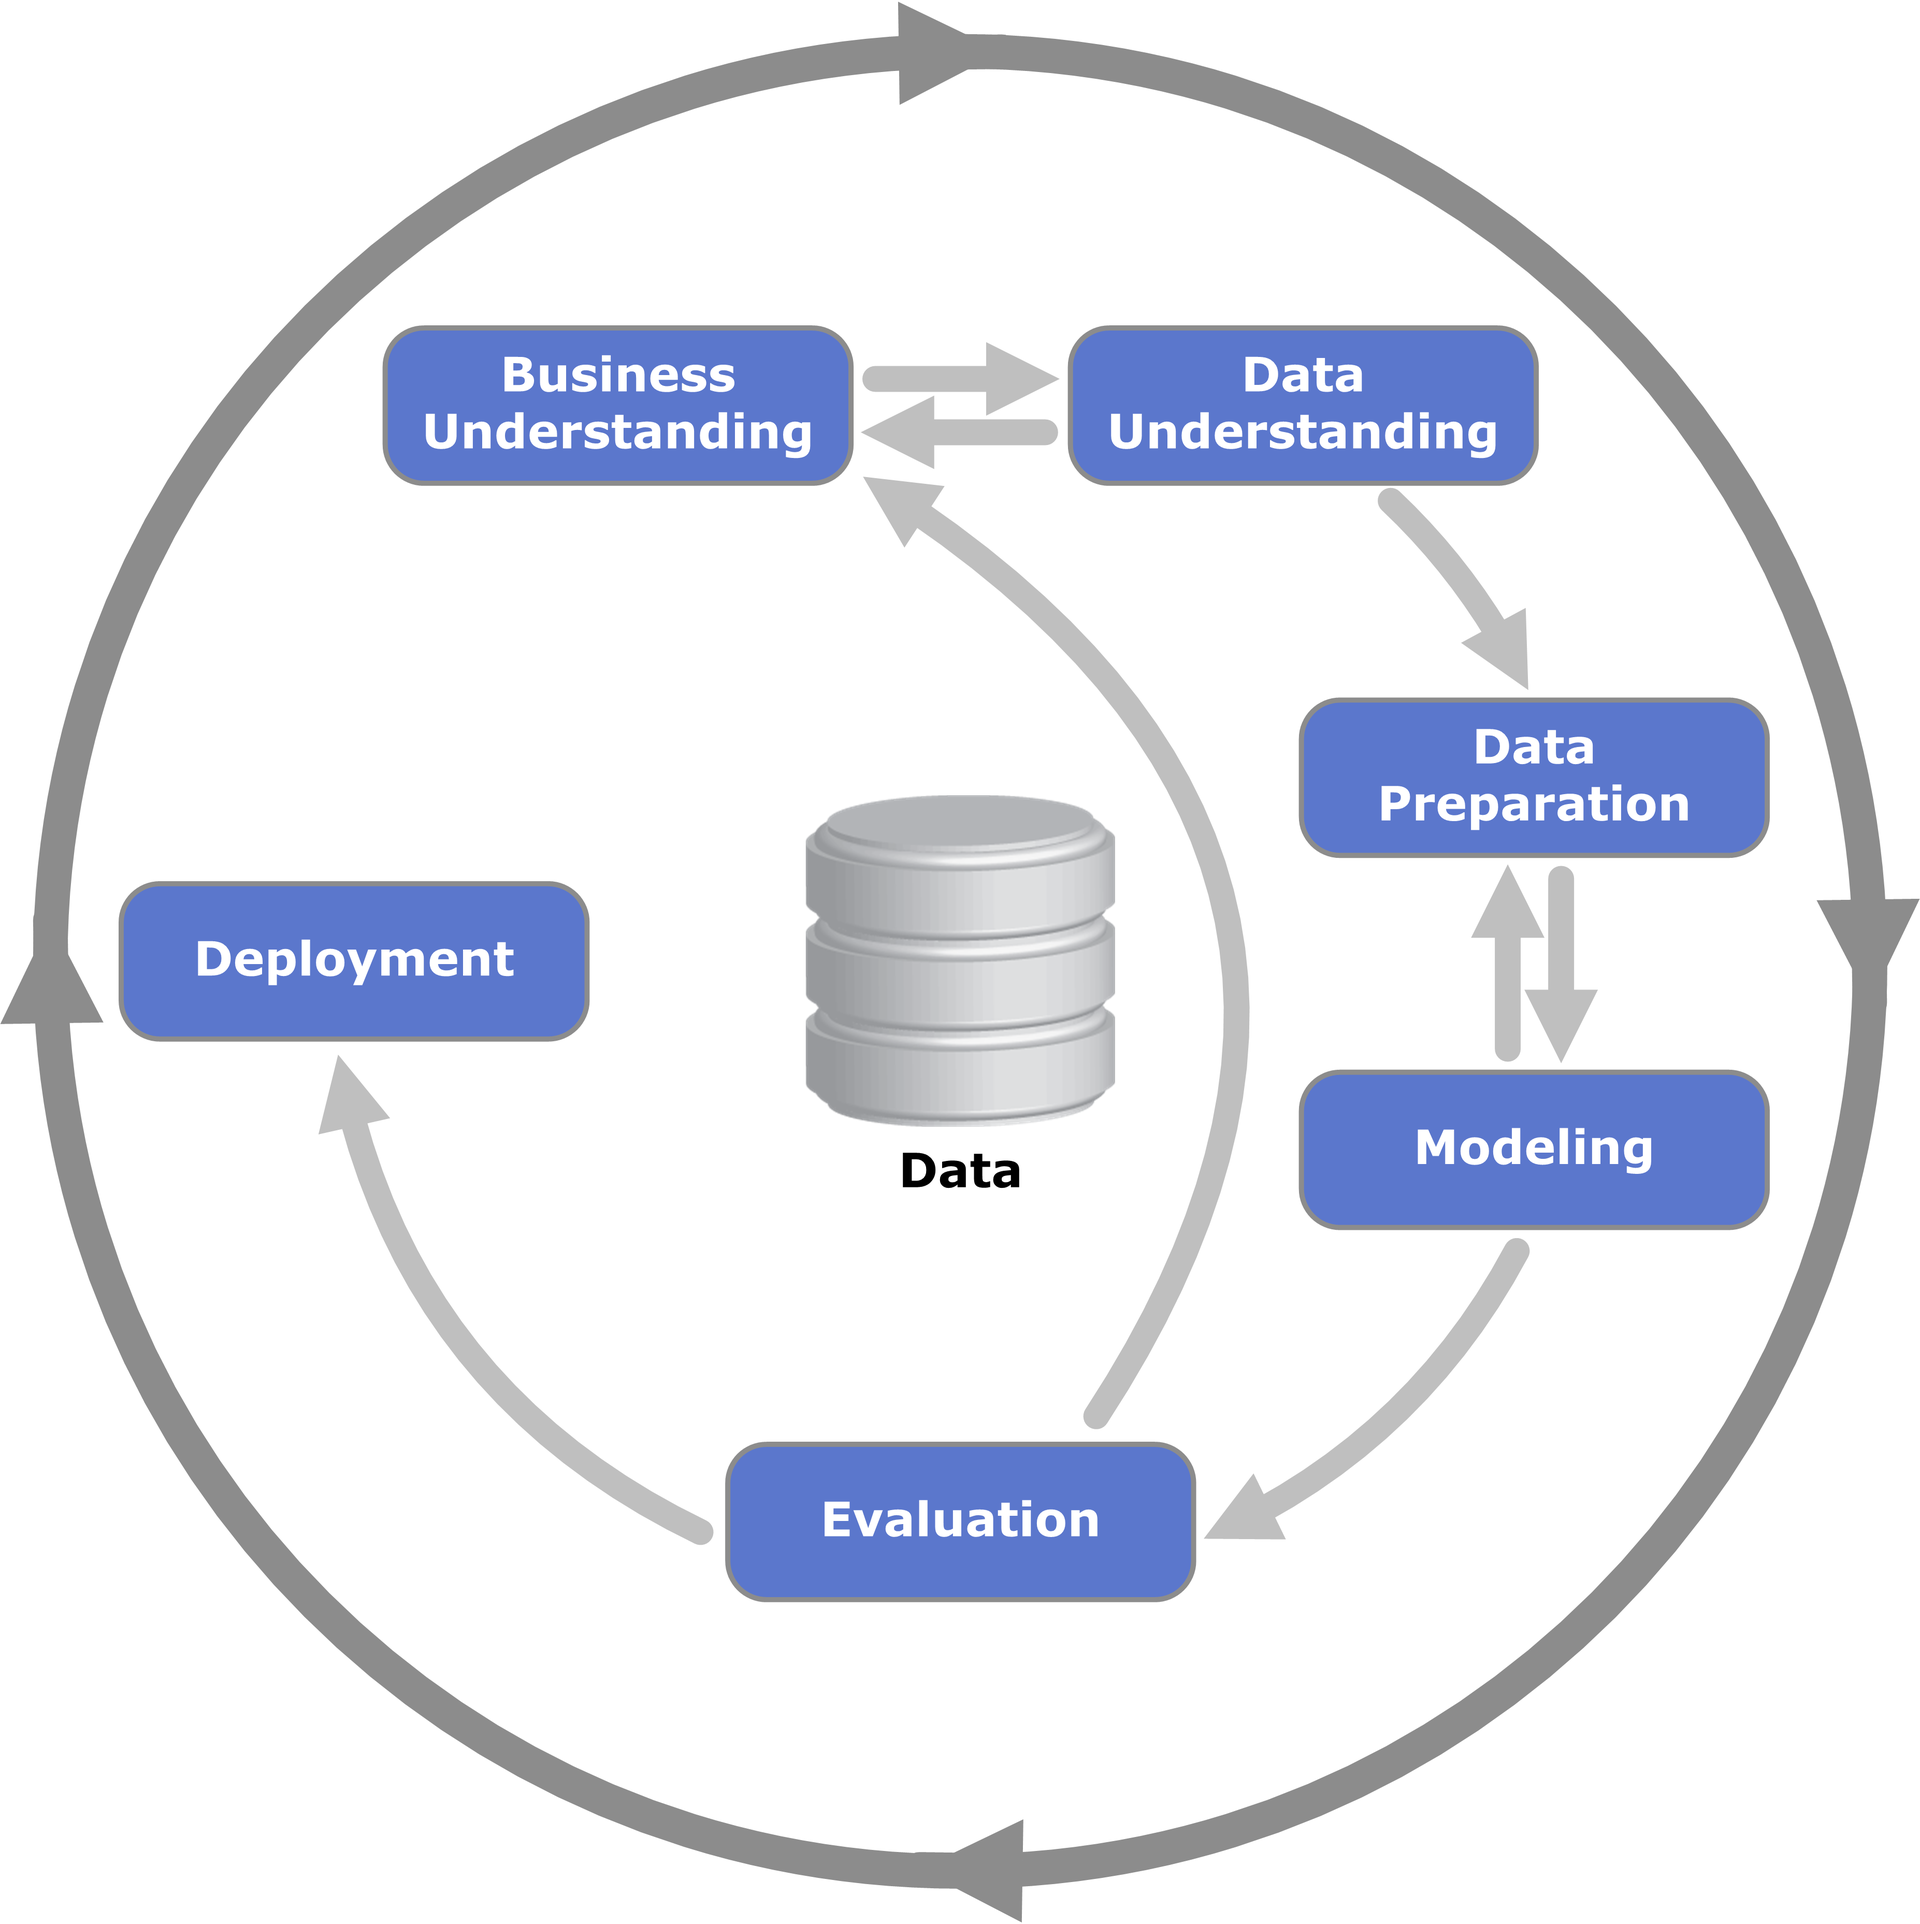

Thank you!